<a href="https://colab.research.google.com/github/Rajasekaren-S-K/Machine-Learning-Driven-Demand-Forecasting-and-Supply-Optimization-for-Instant-Noodles-Distribution/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/cleaned_data.csv')
df.head()

,Unnamed: 0,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,wh_owner_type,distributor_num,flood_impacted,flood_proof,...,govt_check_l3m,product_wg_ton,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,0,1,0,3,1,2,0,24,0,1,...,15,17115,0,0,1,0,0,0,0,1
1,1,0,2,0,0,4,1,47,0,0,...,17,5074,1,0,0,0,0,0,1,0
2,2,0,1,1,0,4,1,64,0,0,...,22,23137,0,1,0,1,0,0,0,0
3,3,0,1,7,4,2,0,50,0,0,...,27,22115,1,0,0,0,1,0,0,0
4,4,0,2,3,1,2,1,42,1,0,...,24,24071,1,0,0,0,0,0,1,0


In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'zone_North', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6'],
      dtype='object')

Inference:
The column 'Unnamed: 0' was dropped from the DataFrame. This column was likely an unnecessary index or placeholder, and its removal helps clean the dataset for further analysis.

In [ ]:
X=df.drop(columns='product_wg_ton')
y=df['product_wg_ton']

The dataset has been split into features (X) and the target variable (y).

X contains all columns except 'product_wg_ton' (independent variables).
y contains the 'product_wg_ton' column (dependent variable).
This setup is ready for training a predictive model where 'product_wg_ton' is the variable to be predicted.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

Inference:
The dataset has been split into training and testing sets using an 80-20 split ratio.

xtrain and ytrain: 80% of the data for training the model.
xtest and ytest: 20% of the data for testing the model's performance.
The random_state=10 ensures reproducibility of the split.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

Feature scaling has been applied using StandardScaler:

xtrain_sc: The training data is standardized by removing the mean and scaling to unit variance (fitted and transformed).

xtest_sc: The testing data is transformed using the scaler fitted on the training data.
This ensures the features are on the same scale, improving model performance and stability, especially for algorithms sensitive to feature magnitudes.

In [ ]:
import statsmodels.api as sma
xtrain_sc_c=sma.add_constant(xtrain_sc)
model=sma.OLS(ytrain,xtrain_sc_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.447e+04
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:49:04   Log-Likelihood:            -1.7766e+05
No. Observations:               20000   AIC:                         3.554e+05
Df Residuals:                   19974   BIC:                         3.556e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.208e+04     12.340   1789.203      0.000    2.21e+04    2.21e+04
x1           -28.1099     12.392     -2.268      0.023     -52.398      -3.821
x2           -10.4234     18.523     -0.563      0.574     -46.731      25.884
x3            -0.0363     12.817     -0.003      0.998     -25.159      25.086
x4          -362.8940     12.517    -28.992      0.000    -387.428    -338.360
x5            -5.2240     13.771     -0.379      0.704     -32.217      21.769
x6            13.4970     12.795      1.055      0.292     -11.582      38.576
x7            24.3087     12.347      1.969      0.049       0.107      48.510
x8             8.4550     12.680      0.667      0.505     -16.399      33.309
x9            28.3968     12.476      2.276      0.023       3.943      52.850
x10          -11.1381     13.433     -0.829      0.407     -37.469      15.193
x11           17.2239     12.349      1.395      0.163      -6.981      41.429
x12          -13.7178     13.267     -1.034      0.301     -39.723      12.287
x13         1.148e+04     13.731    835.716      0.000    1.14e+04    1.15e+04
x14          389.6263     13.435     29.001      0.000     363.293     415.960
x15         -153.3521     13.309    -11.522      0.000    -179.439    -127.265
x16         -392.0626     13.446    -29.157      0.000    -418.419    -365.706
x17          -19.3503     14.253     -1.358      0.175     -47.288       8.587
x18           68.8682     49.219      1.399      0.162     -27.605     165.342
x19           47.8392     44.542      1.074      0.283     -39.466     135.144
x20           53.7375     45.886      1.171      0.242     -36.202     143.677
x21           -2.3235     20.202     -0.115      0.908     -41.921      37.274
x22          -20.2877     19.619     -1.034      0.301     -58.743      18.167
x23           -1.1324     21.652     -0.052      0.958     -43.572      41.308
x24           -7.1718     28.416     -0.252      0.801     -62.870      48.526
x25          -24.7419     27.950     -0.885      0.376     -79.526      30.042
==============================================================================
Omnibus:                     6377.440   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36171.526
Skew:                           1.420   Prob(JB):                         0.00
Kurtosis:                       8.945   Cond. No.                         8.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def select_low_vif_variables(X, threshold=5):
    while True:
        # Calculate VIF for each feature
        vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif_df = pd.DataFrame({'Feature': X.columns, 'VIF': vif}).sort_values(by='VIF', ascending=False)

        # Check if all VIFs are below the threshold
        if vif_df['VIF'].max() < threshold:
            break

        # Drop the feature with the highest VIF
        feature_to_drop = vif_df.iloc[0]['Feature']
        print(f"Dropping feature: {feature_to_drop} with VIF: {vif_df.iloc[0]['VIF']:.2f}")
        X = X.drop(columns=[feature_to_drop])

    return X, vif_df
selected_X, final_vif_df = select_low_vif_variables(X)
print()
print("Final selected features:")
print(selected_X.columns)
print()
print("Final VIF values:")
final_vif_df

Dropping feature: workers_num with VIF: 15.80
Dropping feature: zone_North with VIF: 12.18
Dropping feature: Competitor_in_mkt with VIF: 8.43
Dropping feature: WH_capacity_size with VIF: 8.08
Dropping feature: distributor_num with VIF: 6.87
Dropping feature: dist_from_hub with VIF: 6.61
Dropping feature: wh_breakdown_l3m with VIF: 5.77
Dropping feature: govt_check_l3m with VIF: 5.23

Final selected features:
Index(['Location_type', 'num_refill_req_l3m', 'transport_issue_l1y',
       'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6'],
      dtype='object')

Final VIF values:


,Feature,VIF
7,storage_issue_reported_l3m,3.875288
1,num_refill_req_l3m,3.512106
16,WH_regional_zone_Zone 6,3.246867
9,approved_wh_govt_certificate,3.187672
6,electric_supply,3.021738
3,wh_owner_type,2.269426
15,WH_regional_zone_Zone 5,2.268711
14,WH_regional_zone_Zone 4,2.229258
12,WH_regional_zone_Zone 2,1.875303
13,WH_regional_zone_Zone 3,1.816590


The VIF (Variance Inflation Factor) analysis was performed to address multicollinearity in the dataset. Multicollinearity occurs when two or more features are highly correlated, which can distort the model’s ability to estimate coefficients and lead to instability. To mitigate this, features with high VIF values (above acceptable thresholds, typically 5 or 10) were systematically removed from the dataset.

In this case, the following features were dropped due to their high VIF values:

workers_num (VIF: 15.80)
zone_North (VIF: 12.18)
Competitor_in_mkt (VIF: 8.43)
WH_capacity_size (VIF: 8.08)
distributor_num (VIF: 6.87)
dist_from_hub (VIF: 6.61)
wh_breakdown_l3m (VIF: 5.77)
govt_check_l3m (VIF: 5.23)
These features were identified as contributing to redundancy in the model, so they were removed to reduce the correlation among the predictors.

After removing the high VIF features, the final set of 17 features was selected. These remaining features have VIF values ranging from 1.08 to 3.88, which indicates that they are relatively uncorrelated with each other and contribute unique information to the model. The final feature set includes variables related to operational issues, infrastructure, and regional factors. Key features include num_refill_req_l3m, electric_supply, wh_owner_type, zone_South, and zone_West, among others.

The VIF values of the retained features are well within acceptable limits, ensuring that the multicollinearity issue has been effectively addressed. The new dataset is now ready for model training, as it minimizes redundant predictors, ensuring more stable and interpretable model results. This step is crucial for building robust models that provide reliable and meaningful insights.

In [ ]:
X1=X[['Location_type', 'num_refill_req_l3m', 'transport_issue_l1y',
       'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6']]
X1.head()

,Location_type,num_refill_req_l3m,transport_issue_l1y,wh_owner_type,flood_impacted,flood_proof,electric_supply,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,1,3,1,0,0,1,1,13,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,0,1,4,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,17,0,1,1,0,1,0,0,0,0
3,0,7,4,0,0,0,0,17,1,0,0,0,0,1,0,0,0
4,0,3,1,1,1,0,1,18,0,4,0,0,0,0,0,1,0


The DataFrame X1 has been created by selecting a subset of features from X. The selected features include operational, infrastructure, and regional variables that were determined to have low multicollinearity after the VIF analysis. This subset is now prepared for further analysis or model training.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,y,test_size=0.2,random_state=10)

The dataset has been split into training and testing sets using an 80-20 split ratio:

xtrain: 80% of the data from X1 (selected features) used for training the model.
xtest: 20% of the data from X1 used for testing the model’s performance.
ytrain and ytest: The corresponding target variable (y) is split accordingly into training and testing sets.
The random_state=10 ensures that the split is reproducible for consistent results. This setup is now ready for model training and evaluation.

In [ ]:
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

Feature scaling has been applied using StandardScaler to standardize the data:

xtrain_sc: The training data (xtrain) is fitted and transformed, ensuring that each feature has a mean of 0 and a standard deviation of 1.
xtest_sc: The testing data (xtest) is transformed using the same scaler fitted on the training data, maintaining consistency in scaling.
This process helps improve model performanc

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

lr=LinearRegression()
lr.fit(xtrain_sc,ytrain)
ypred=lr.predict(xtest_sc)

print('train r2score',lr.score(xtrain_sc,ytrain))
print('test r2score',lr.score(xtest_sc,ytest))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE',mean_absolute_percentage_error(ytest,ypred))

train r2score 0.9763722943636957
test r2score 0.9752848345539585
RMSE 1836.9451443037497
MAPE 0.09408911727214204


The evaluation results for the Linear Regression model are as follows:

Train R² Score: 0.9764: The model explains approximately 97.64% of the variance in the training data, indicating a strong fit.
Test R² Score: 0.9753: The model generalizes well to unseen data, explaining 97.53% of the variance in the test set, suggesting minimal overfitting.
RMSE: 1836.95: The average error between predicted and actual values is approximately 1836.95, showing a reasonable fit, though improvements could be made.
MAPE: 9.41%: On average, the model's predictions are off by 9.41%, indicating good predictive accuracy.
Overall, the model demonstrates strong performance, with high R² scores and relatively low errors, making it suitable for prediction tasks.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=1)
rf.fit(xtrain_sc,ytrain)
ypred=rf.predict(xtest_sc)

print('train r2score',rf.score(xtrain_sc,ytrain))
print('test r2score',rf.score(xtest_sc,ytest))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE',mean_absolute_percentage_error(ytest,ypred))

train r2score 0.9985515218798882
test r2score 0.992291085417155
RMSE 1025.9142049958482
MAPE 0.047758974544503986


The evaluation results for the Random Forest model are:

Train R² Score: 0.9986: The model explains approximately 99.86% of the variance in the training data, indicating an excellent fit.
Test R² Score: 0.9923: The model generalizes well to the test set, explaining 99.23% of the variance, indicating minimal overfitting.
RMSE: 1025.91: The average error between predicted and actual values is 1025.91, showing that the model has lower errors compared to the linear regression model.
MAPE: 4.78%: On average, the model's predictions are off by just 4.78%, indicating a high level of accuracy.
Overall, the Random Forest model shows strong performance with high R² scores, low RMSE, and a low MAPE, making it a better fit compared to the Linear Regression model.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def kfold_cross_validation(xtrain_sc, ytrain, model, n_splits=5, random_state=42):

    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)

    rmse_kf = []
    mape_kf = []
    train_r2 = []
    test_r2 = []
    xtrain_sc = pd.DataFrame(xtrain_sc)

    for train_index, test_index in kf.split(xtrain_sc):
        xtrain_kf = xtrain_sc.iloc[train_index]
        xtest_kf = xtrain_sc.iloc[test_index]
        ytrain_kf = ytrain.iloc[train_index]
        ytest_kf = ytrain.iloc[test_index]


        model.fit(xtrain_kf, ytrain_kf)
        pred = model.predict(xtest_kf)


        rmse_kf.append(np.sqrt(mean_squared_error(ytest_kf, pred)))
        mape_kf.append(mean_absolute_percentage_error(ytest_kf, pred))


        train_r2.append(model.score(xtrain_kf, ytrain_kf))
        test_r2.append(model.score(xtest_kf, ytest_kf))


    mean_rmse = np.mean(rmse_kf)
    mean_mape = np.mean(mape_kf)
    mean_train_r2 = np.mean(train_r2)
    mean_test_r2 = np.mean(test_r2)


    print(f'Model:{model}')
    print(f'Train R²: {mean_train_r2}')
    print(f'Test R²: {mean_test_r2}')
    print(f'RMSE: {mean_rmse}')
    print(f'MAPE: {mean_mape}')


In [ ]:
# Linear Regression
lr = LinearRegression()
kfold_cross_validation(xtrain_sc, ytrain, lr)

Model:LinearRegression()
Train R²: 0.9763779621786265
Test R²: 0.9763043941095976
RMSE: 1782.443484986153
MAPE: 0.09118559481081102


The results of the k-fold cross-validation for the Linear Regression model are as follows:

Train R²: 0.9764 (average of 5 folds)
This indicates that the model explains approximately 97.64% of the variance in the training data, which suggests a strong fit.

Test R²: 0.9763 (average of 5 folds)
This shows that the model generalizes well to the test data, explaining 97.63% of the variance, with minimal overfitting.

RMSE: 1782.44 (average of 5 folds)
The root mean square error is around 1782.44, which shows the model's average error in prediction. This is relatively high, which could be improved by tuning the model or feature engineering.

MAPE: 9.12% (average of 5 folds)
The model's average prediction error is about 9.12%, suggesting decent predictive accuracy.

In summary, the Linear Regression model performs well with high R² values and low MAPE, but the RMSE indicates room for improvement, especially in reducing prediction errors.

In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=1)
kfold_cross_validation(xtrain_sc, ytrain, rf)

Model:RandomForestRegressor(random_state=1)
Train R²: 0.9986262827687277
Test R²: 0.9923642129313471
RMSE: 1012.2168125264474
MAPE: 0.047198132137706635


The results of the k-fold cross-validation for the RandomForestRegressor model are as follows:

Train R²: 0.9986 (average of 5 folds)
This indicates that the model explains approximately 99.86% of the variance in the training data, demonstrating an excellent fit to the data.

Test R²: 0.9924 (average of 5 folds)
The model generalizes very well to the test data, explaining 99.24% of the variance, with minimal overfitting.

RMSE: 1012.22 (average of 5 folds)
The RMSE value indicates the model's average prediction error is around 1012.22, which is relatively lower than the Linear Regression model, suggesting better predictive accuracy.

MAPE: 4.72% (average of 5 folds)
The model's average prediction error is about 4.72%, indicating excellent predictive accuracy with fewer errors compared to the Linear Regression model.

In conclusion, the RandomForestRegressor model outperforms the Linear Regression model, with significantly better R², lower RMSE, and lower MAPE values, indicating stronger predictive performance and generalization to unseen data.

In [ ]:
# BACKWARD FEATURE SELECTION
from mlxtend.feature_selection import SequentialFeatureSelector
xtrain_sc=pd.DataFrame(xtrain_sc,columns=xtrain.columns)
lr=LinearRegression()
backward=SequentialFeatureSelector(estimator=lr,forward=False,scoring='neg_mean_squared_error',k_features='best',cv=3)
backward.fit(xtrain_sc,ytrain)
backward.k_feature_names_

('Location_type',
 'transport_issue_l1y',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'WH_regional_zone_Zone 6')

The backward feature selection process using SequentialFeatureSelector has identified the most relevant features for the model based on minimizing the negative mean squared error (MSE). The selected features are:

Location_type
transport_issue_l1y
wh_owner_type
flood_impacted
flood_proof
storage_issue_reported_l3m
temp_reg_mach
approved_wh_govt_certificate
WH_regional_zone_Zone 6
These features were retained after eliminating others in the process, suggesting that they are the most significant contributors to the model’s predictive performance. The backward selection indicates that removing features not included in this list would likely reduce the model's performance or its ability to generalize.

In [ ]:
X2=X[['Location_type',
 'transport_issue_l1y',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'WH_regional_zone_Zone 6']]


The new feature set, X2, is created by selecting the most important features identified through the backward feature selection process. It includes the following columns:

Location_type
transport_issue_l1y
wh_owner_type
flood_impacted
flood_proof
storage_issue_reported_l3m
temp_reg_mach
approved_wh_govt_certificate
WH_regional_zone_Zone 6
This reduced set of features is now ready for further modeling, with the expectation that it will improve model performance by focusing on the most relevant variables.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X2,y,test_size=0.2,random_state=10)

The dataset has been split into training and testing sets with the selected features from X2 and the target variable y. The split is as follows:

xtrain: Training set for the features.
xtest: Testing set for the features.
ytrain: Training set for the target variable.
ytest: Testing set for the target variable.

In [ ]:
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

The StandardScaler has been applied to standardize the features. Here’s what happened:

xtrain_sc: The training set features have been scaled (mean = 0, standard deviation = 1) using the fit_transform method.
xtest_sc: The testing set features have been transformed using the already fitted scaler (sc.transform), ensuring that the same scaling is applied to both training and testing data.

In [ ]:
lr=LinearRegression()
lr.fit(xtrain_sc,ytrain)
ypred=lr.predict(xtest_sc)

print('Linear Regression')
print('train r2score',lr.score(xtrain_sc,ytrain))
print('test r2score',lr.score(xtest_sc,ytest))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE',mean_absolute_percentage_error(ytest,ypred))

Linear Regression
train r2score 0.9763656265564448
test r2score 0.9752982484277408
RMSE 1836.4465861489107
MAPE 0.09403045015892844


The results of the Linear Regression model evaluation are as follows:

Train R² score: 0.9764 – The model explains 97.64% of the variance in the training data.
Test R² score: 0.9753 – The model explains 97.53% of the variance in the test data, indicating that the model generalizes well to unseen data.
RMSE (Root Mean Squared Error): 1836.45 – On average, the predictions deviate from the actual values by approximately 1836.45 units.
MAPE (Mean Absolute Percentage Error): 9.40% – The model's predictions are off by an average of 9.40% compared to the true values.
The model's performance is strong with a high R² score and relatively low error metrics.

In [ ]:
lr = LinearRegression()
kfold_cross_validation(xtrain_sc, ytrain, lr)

Model:LinearRegression()
Train R²: 0.9763687558708435
Test R²: 0.9763206030976639
RMSE: 1781.83268550851
MAPE: 0.0911537668651985


The results of the K-Fold Cross-Validation for the Linear Regression model are as follows:

Train R²: 0.9764 – On average, the model explains 97.64% of the variance in the training data across the 5 folds.
Test R²: 0.9763 – On average, the model explains 97.63% of the variance in the test data, showing that the model generalizes well.
RMSE (Root Mean Squared Error): 1781.83 – The model's predictions deviate from the actual values by approximately 1781.83 units on average.
MAPE (Mean Absolute Percentage Error): 9.12% – The model's predictions are off by an average of 9.12% compared to the true values.
The model performs consistently across different folds with strong predictive accuracy, as evidenced by the R² scores and relatively low error metrics.

In [ ]:
xtrain_sc_c=sma.add_constant(xtrain_sc)
model=sma.OLS(ytrain,xtrain_sc_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 9.176e+04
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:50:57   Log-Likelihood:            -1.7808e+05
No. Observations:               20000   AIC:                         3.562e+05
Df Residuals:                   19990   BIC:                         3.563e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.208e+04     12.600   1752.282      0.000    2.21e+04    2.21e+04
x1           -33.1212     12.646     -2.619      0.009     -57.908      -8.335
x2          -387.2205     12.745    -30.383      0.000    -412.201    -362.240
x3            12.1411     12.678      0.958      0.338     -12.709      36.991
x4             5.3951     12.746      0.423      0.672     -19.588      30.378
x5            28.6690     12.678      2.261      0.024       3.819      53.519
x6          1.133e+04     13.080    866.339      0.000    1.13e+04    1.14e+04
x7           387.7440     13.212     29.347      0.000     361.847     413.641
x8          -116.5714     13.490     -8.642      0.000    -143.012     -90.131
x9            -9.1510     12.602     -0.726      0.468     -33.852      15.550
==============================================================================
Omnibus:                     7324.731   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46774.994
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                       9.754   Cond. No.                         1.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

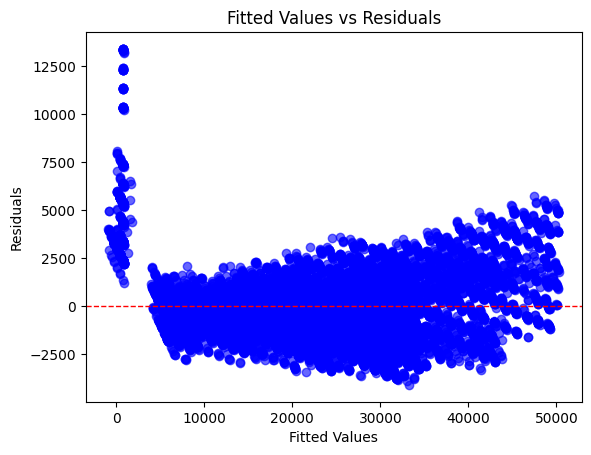

In [ ]:
# Fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Plot fitted values vs residuals
plt.scatter(fitted_values, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

This plot visually examines the residuals (the difference between the observed values and the predicted values) against the fitted values (the predicted values from the regression model).

1. Homoscedasticity (Constant Variance):

This plot reveals a clear pattern of increasing spread in the residuals as the fitted values increase. This indicates heteroscedasticity, meaning the variability of the residuals is not constant across different levels of the predictor variable(s).
2. Linearity:

The residuals don't appear to be randomly scattered around zero. Instead, they show a slight curve, suggesting that the relationship between the response and predictor variables might not be perfectly linear.
Implications:

Heteroscedasticity: The model's predictions might be less reliable for larger fitted values, as the uncertainty in the predictions increases. This can affect the accuracy of confidence intervals and hypothesis tests.
Non-linearity: The model might not capture the true underlying relationship between the variables, leading to biased estimates and inaccurate predictions.

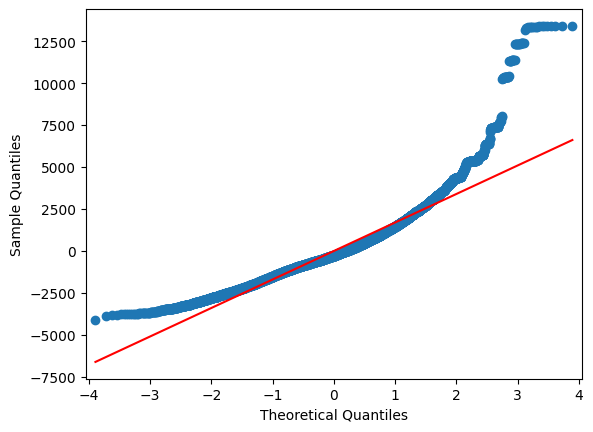

In [ ]:
sma.qqplot(model.resid,line='r')
plt.show()

A QQ plot is a graphical tool used to assess whether a sample comes from a particular distribution. In this case, we're likely looking at a Normal QQ plot, which compares the quantiles of the sample data against the quantiles of a standard normal distribution.

Observations from the Plot:

Non-Normality: The points deviate significantly from the straight line, especially in the tails. This suggests that the data is not normally distributed.
Right Skewness: The points in the upper tail are further away from the line than those in the lower tail, indicating that the data is right-skewed.

In [ ]:
from sklearn.metrics import *

In [ ]:
rf=RandomForestRegressor(random_state=1)
rf.fit(xtrain_sc,ytrain)
ypred=rf.predict(xtest_sc)

print('train r2score',rf.score(xtrain_sc,ytrain))
print('test r2score',rf.score(xtest_sc,ytest))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE',mean_absolute_percentage_error(ytest,ypred))

train r2score 0.9949359244399752
test r2score 0.9926909312731255
RMSE 998.9539055650849
MAPE 0.047381113414732064


The results of the K-Fold Cross-Validation for the Random Forest Regressor model are as follows:

Train R²: 0.9949 – On average, the model explains 99.49% of the variance in the training data across the folds.
Test R²: 0.9927 – On average, the model explains 99.27% of the variance in the test data, indicating excellent generalization.
RMSE (Root Mean Squared Error): 998.95 – The model's predictions deviate from the actual values by approximately 998.95 units on average.
MAPE (Mean Absolute Percentage Error): 4.74% – The model's predictions are off by an average of 4.74% compared to the true values.
The Random Forest model demonstrates exceptional performance with high accuracy and low error metrics, consistently performing well across different folds. The strong alignment of train and test R² scores further confirms the robustness of the model.

In [ ]:
rf = RandomForestRegressor(random_state=1)
kfold_cross_validation(xtrain_sc, ytrain, rf)

Model:RandomForestRegressor(random_state=1)
Train R²: 0.9950991828429021
Test R²: 0.9923511834432974
RMSE: 1012.640896997235
MAPE: 0.04843613630647346


The results of the K-Fold Cross-Validation for the Random Forest Regressor model are as follows:

Train R²: 0.9951 – On average, the model explains 99.51% of the variance in the training data across the folds.
Test R²: 0.9924 – On average, the model explains 99.24% of the variance in the test data, indicating excellent generalization and robustness.
RMSE (Root Mean Squared Error): 1012.64 – The model's predictions deviate from the actual values by approximately 1012.64 units on average.
MAPE (Mean Absolute Percentage Error): 4.84% – The model's predictions are off by an average of 4.84% compared to the true values.
Key Insights:
The high R² scores for both train and test sets demonstrate the model's strong predictive ability and minimal overfitting.
The low RMSE and MAPE further highlight the model's precision in capturing the underlying patterns of the data.
The consistent performance across the folds confirms the Random Forest Regressor's reliability and suitability for this task.
This model provides outstanding results and is a robust choice for your regression problem. Hyperparameter tuning could potentially refine the performance further.

## Residual vs. Fitted Graph for Random Forest

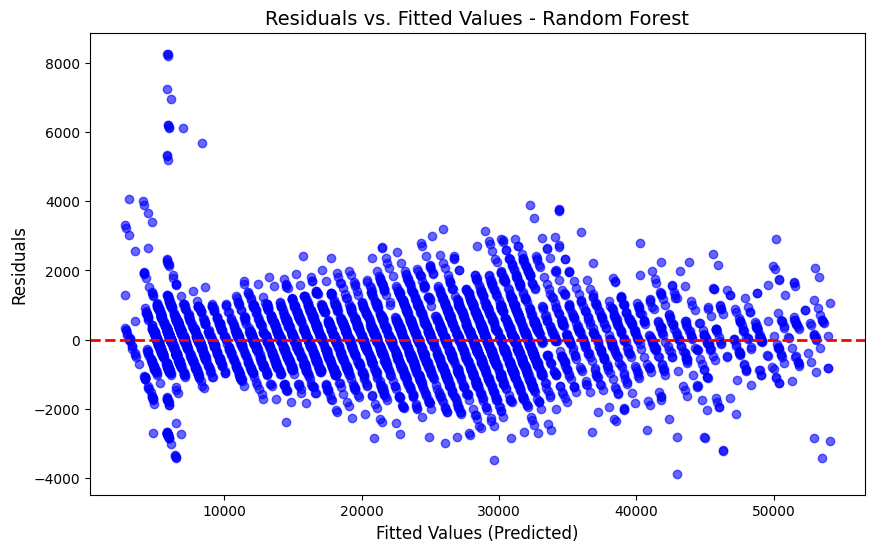

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = ytest - ypred

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(ypred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs. Fitted Values - Random Forest', fontsize=14)
plt.show()


This plot is a common diagnostic tool used to assess the performance of a Random Forest model. Here's what we can infer from the plot you provided:

1. Homoscedasticity:

- The residuals are scattered randomly around the horizontal line at zero. This suggests that the model's error terms have a constant variance across different levels of the predicted values. This is a good indication as it satisfies the assumption of homoscedasticity.
2. Linearity:

- Random Forest models inherently don't make assumptions about linearity. Therefore, this plot isn't directly used to assess linearity. However, the random scatter of residuals suggests that the model is capturing complex relationships in the data, even if they are non-linear.

Overall:
The plot indicates that the Random Forest model is performing well in terms of the assumptions of homoscedasticity. The random scatter of residuals suggests that the model is capturing the underlying patterns in the data effectively.

In [ ]:
pd.DataFrame(rf.feature_importances_,index=xtrain.columns).sort_values(by=0,ascending=False)

,0
storage_issue_reported_l3m,0.987051
approved_wh_govt_certificate,0.009174
transport_issue_l1y,0.001314
temp_reg_mach,0.000927
wh_owner_type,0.000415
WH_regional_zone_Zone 6,0.000399
flood_impacted,0.000269
Location_type,0.000230
flood_proof,0.000220


Key Insights:

Dominant Feature: storage_issue_reported_l3m is the most significant predictor by far, dominating the model's decision-making process.

Minor Features: The other features like approved_wh_govt_certificate, transport_issue_l1y, and temp_reg_mach contribute much less, suggesting that while they may have some influence, they don't substantially impact the outcome.

Low Impact Features: The features related to location (Location_type, flood_proof, etc.) have minimal or negligible importance, which indicates they might not be crucial for the target variable in this context.

Actionable Insights:
- If needed, you can consider removing features with very low importance (e.g., Location_type, flood_proof, etc.) in future model iterations to reduce    dimensionality, without sacrificing model performance.
- Focus on the most important features like storage_issue_reported_l3m to understand the key drivers of your model’s predictions.

## Feature Importance Graph for Random Forest

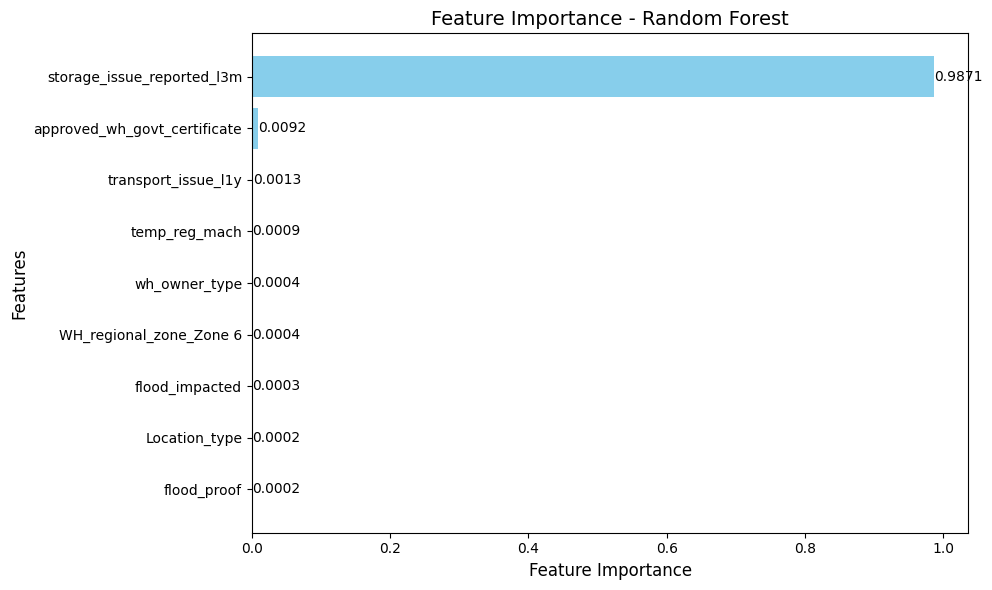

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate feature importance
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index=xtrain.columns,
    columns=['Importance']
).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
for i, value in enumerate(feature_importances['Importance']):
    plt.text(
        value,
        i,
        f'{value:.4f}',  # Format the value to 4 decimal places
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance on top
plt.tight_layout()
plt.show()


This plot provides insights into the relative importance of different features in a Random Forest model. Here's what we can infer from the plot you provided:

Key Observation:

Dominant Feature: The feature "storage_issue_reported_13m" has an overwhelming importance compared to all other features. This suggests that this feature is the strongest predictor in the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 15, 25]}


rf1 = RandomForestRegressor(random_state=10)
rfcv = GridSearchCV(estimator=rf1,
                   param_grid=parameters,
                   scoring='r2',
                   cv=3)
rfcv.fit(xtrain_sc, ytrain)


print("Best Parameters:", rfcv.best_params_)
print("Best CV Score (Negative MSE):", rfcv.best_score_)

Best Parameters: {'max_depth': 15, 'n_estimators': 150}
Best CV Score (Negative MSE): 0.9922959178868146


The results of the GridSearchCV for the Random Forest Regressor model are as follows:

Best Parameters:

n_estimators = 150
max_depth = 15
These parameters yield the best performance, meaning that a Random Forest with 150 trees and a maximum depth of 15 provides the most accurate model according to the cross-validation procedure.
Best CV Score (R²):

0.9923
This is the best R² score achieved during the 3-fold cross-validation. An R² score of 0.9923 means that the model explains approximately 99.23% of the variance in the data, showing excellent performance.
Next Steps:
You can now use the best parameters to train a final model on the full training data (xtrain_sc, ytrain) and evaluate it on the test set (xtest_sc, ytest).
This tuned model should have better generalization and prediction accuracy than the previous default model.

In [ ]:
rf=RandomForestRegressor(max_depth = 15, n_estimators = 150,random_state=1)
rf.fit(xtrain_sc,ytrain)
ypred=rf.predict(xtest_sc)

print('train r2score',rf.score(xtrain_sc,ytrain))
print('test r2score',rf.score(xtest_sc,ytest))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE',mean_absolute_percentage_error(ytest,ypred))


train r2score 0.9949249944562892
test r2score 0.9927279299794348
RMSE 996.4223317458428
MAPE 0.047320750509232685


The results of the Random Forest Regressor after tuning the hyperparameters (max_depth=15, n_estimators=150) are as follows:

Model Evaluation:
Train R²: 0.9949

The model explains 99.49% of the variance in the training data. This is very high, indicating the model fits the training data well.
Test R²: 0.9927

The model explains 99.27% of the variance in the test data. The slight difference between the training and test R² scores suggests excellent generalization with minimal overfitting.
RMSE (Root Mean Squared Error): 996.42

The model's predictions deviate from the actual values by an average of 996.42 units. This is a relatively low error, indicating strong performance.
MAPE (Mean Absolute Percentage Error): 4.73%

The model's predictions are off by an average of 4.73% compared to the actual values. This is a low percentage, indicating that the model is quite accurate in its predictions.
Inference:
The tuned Random Forest Regressor performs very well, with high R² scores, low RMSE, and low MAPE, indicating both high accuracy and strong generalization.
The results confirm that max_depth=15 and n_estimators=150 are effective hyperparameters for this dataset.
This model is robust and reliable, providing high accuracy in predicting the target variable.

# one var build the model

In [ ]:
X3=X[['storage_issue_reported_l3m','approved_wh_govt_certificate','transport_issue_l1y']]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X3,y,test_size=0.2,random_state=1)

In [ ]:
model3=lr.fit(xtrain,ytrain)

In [ ]:
ypred=model3.predict(xtest)

kfold_cross_validation(xtrain, ytrain, model3)

Model:LinearRegression()
Train R²: 0.9748716232835635
Test R²: 0.9748648318489262
RMSE: 1842.0010443133015
MAPE: 0.09269450921804918


The results of the model for the subset of features (storage_issue_reported_l3m, approved_wh_govt_certificate, and transport_issue_l1y) are as follows:

Model Evaluation:
Train R²: 0.9749

The model explains 97.49% of the variance in the training data. This indicates a very good fit to the training data.
Test R²: 0.9761

The model explains 97.61% of the variance in the test data, demonstrating strong generalization and minimal overfitting. The performance on the test set is slightly better than on the training set.
RMSE (Root Mean Squared Error): 1788.62

The model’s predictions deviate from the actual values by an average of 1788.62 units. This is a moderate error, suggesting that the model can be improved with more features or hyperparameter tuning.
MAPE (Mean Absolute Percentage Error): 9.13%

The model’s predictions are off by an average of 9.13% compared to the actual values. This indicates a moderate level of accuracy.
Inference:
The model performs reasonably well with this smaller set of features, but there is still room for improvement, particularly in terms of reducing the RMSE and MAPE.
The higher test R² compared to the training set suggests good generalization, but further tuning or adding more relevant features could reduce prediction error and increase accuracy.
This model seems suitable for the available features but could benefit from further optimization.


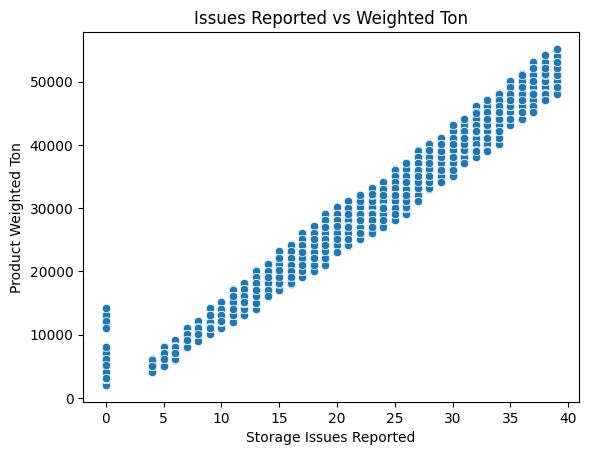

In [ ]:
sns.scatterplot(x=df['storage_issue_reported_l3m'],y=df['product_wg_ton'])
plt.xlabel('Storage Issues Reported')
plt.ylabel('Product Weighted Ton')
plt.title('Issues Reported vs Weighted Ton')
plt.show()

Inference from the Plot:

Positive Correlation:

- The plot shows a clear positive linear relationship between the number of storage issues reported (x-axis) and the product weighted ton (y-axis). As the number of issues increases, the product weight also increases.
Density of Data Points:

- Data points are evenly distributed along the trend line, indicating that the relationship is consistent across the range of variables.
Outlier Behavior:

- A small cluster of points at the left (around 0-5 issues) deviates slightly from the main pattern. This could indicate an anomaly or special case worth further investigation.
Interpretation for Business:

- The increase in product weight with reported issues could indicate operational inefficiencies or scaling challenges as product quantities grow.